In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import pyspark.pandas as ps
import seaborn as sns
from pyspark.sql import SparkSession

In [2]:
df = pd.read_csv('../../Files/Submissions/score/done/author_db.csv')

In [88]:
df4 = pd.read_pickle('../../Files/Submissions/score/done/author_sub_db.pickle')

In [92]:
df4.head()

score                                                       \
subreddit        196           2meirl42meirl4meirl           2meirl4meirl   
class_II           0    1    2                   0    1    2            0   
author                                                                      
-GreggRulzOk-    0.0  0.0  0.0                 0.0  0.0  0.0          0.0   
Bowser914        0.0  0.0  0.0                 0.0  0.0  0.0          0.0   
LordRaghuvnsi    0.0  0.0  0.0                 0.0  0.0  0.0          0.0   
SickestBiscuit   0.0  0.0  0.0                 0.0  0.0  0.0          0.0   
hanglestrangle   0.0  0.0  0.0                 0.0  0.0  0.0          0.0   

                                          ...                               \
subreddit                ABoringDystopia  ... wokekids worldnews             
class_II          1    2               0  ...        2         0    1    2   
author                                    ...                                
-GreggRulzOk-   0.0  0.0             0.0  ...      0.0       0.0  0.0  0.0   
Bowser914       0.0  0.0             0.0  ...      0.0       0.0  1.0  0.0   
LordRaghuvnsi   0.0  0.0             0.0  ...      0.0       0.0  0.0  0.0   
SickestBiscuit  0.0  0.0             0.0  ...      0.0       0.0  0.0  0.0   
hanglestrangle  0.0  0.0             0.0  ...      0.0       0.0  0.0  0.0   

                                                                        
subreddit      worldnewsvideo           yourmomshousepodcast            
class_II                    0    1    2                    0    1    2  
author                                                                  
-GreggRulzOk-             0.0  0.0  0.0                  0.0  0.0  0.0  
Bowser914                 0.0  0.0  0.0                  0.0  0.0  0.0  
LordRaghuvnsi             0.0  0.0  0.0                  0.0  0.0  0.0  
SickestBiscuit            0.0  0.0  0.0                  0.0  0.0  0.0  
hanglestrangle            0.0  0.0  0.0                  0.0  0.0  0.0  

[5 rows x 854 columns]

In [91]:
df4 = df4.fillna(0)

In [96]:
4864702808 + 6150459235 + 4980668762 + 5106821534

21102652339

In [94]:
df4.sum()

       subreddit             class_II
score  196                   0           0.0
                             1           0.0
                             2           0.0
       2meirl42meirl4meirl   0           0.0
                             1           0.0
                                        ... 
       worldnewsvideo        1           0.0
                             2           0.0
       yourmomshousepodcast  0           0.0
                             1           0.0
                             2           0.0
Length: 854, dtype: float64

In [6]:
df.head()

,Author,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts
2,------------------16,NaN,1.0,NaN
3,------------------GL,1.0,NaN,1.0
4,------------------O,NaN,5.0,NaN
5,------------------fd,NaN,1.0,NaN
6,-----------------yes,NaN,1.0,NaN


In [4]:
df = df.drop([0,1], axis=0)

In [5]:
df.rename({'Unnamed: 0': 'Author', 'score' : 'Anti-Vaccine Posts', 'score.1': 'Neutral Posts', 'score.2': 'Pro-Vaccine Posts'}, axis=1, inplace=True)

In [5]:
df.reset_index(drop=True, inplace=True)

In [7]:
df = df.fillna(0)

In [8]:
df['total'] = df['Anti-Vaccine Posts'] + df['Pro-Vaccine Posts'] + df['Neutral Posts']

In [19]:
df['p_an'] = df['Anti-Vaccine Posts'] / df['total']
df['p_ne'] = df['Neutral Posts'] / df['total']
df['p_pr'] = df['Pro-Vaccine Posts'] / df['total']

In [20]:
df.head()

,Author,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts,total,p_an,p_ne,p_pr
2,------------------16,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,------------------GL,1.0,0.0,1.0,2.0,0.5,0.0,0.5
4,------------------O,0.0,5.0,0.0,5.0,0.0,1.0,0.0
5,------------------fd,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,-----------------yes,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [68]:
top_10 = df.sort_values(by='Anti-Vaccine Posts', ascending=False)[1:11].reset_index(drop=True)

In [16]:
top_100 = df.sort_values(by='Anti-Vaccine Posts', ascending=False)[1:21].reset_index(drop=True)

In [13]:
top_11 = df.sort_values(by='Anti-Vaccine Posts', ascending=False)[0:11].reset_index(drop=True)

In [21]:
df2 = df[df['Author'] != '[deleted]']

In [18]:
df2.head()

,Author,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts,total,p_an
2,------------------16,0.0,1.0,0.0,1.0,0.0
3,------------------GL,1.0,0.0,1.0,2.0,0.5
4,------------------O,0.0,5.0,0.0,5.0,0.0
5,------------------fd,0.0,1.0,0.0,1.0,0.0
6,-----------------yes,0.0,1.0,0.0,1.0,0.0


In [45]:
df2['p_an'].std()

0.32908060536125033

In [44]:
df2['p_pr'].std()

0.18972951167151278

In [43]:
df2['p_ne'].std()

0.3604117334165059

In [30]:
df2.head()

,Author,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts,total,p_an,p_ne,p_pr
2,------------------16,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,------------------GL,1.0,0.0,1.0,2.0,0.5,0.0,0.5
4,------------------O,0.0,5.0,0.0,5.0,0.0,1.0,0.0
5,------------------fd,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,-----------------yes,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [27]:
delw = df[df['Author'] == '[deleted]']

In [31]:
delw = delw[['p_an', 'p_ne', 'p_pr']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


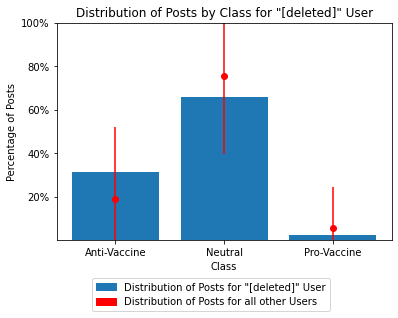

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
# making a simple plot
a = ['Anti-Vaccine', 'Neutral', 'Pro-Vaccine']
b = [0.314028,	0.660497,	0.025475]
  
# Plot scatter here
plt.bar(a,b)  
c = [0.1901911779540875, 0.7557695498354158, 0.0540392722104979]
d = [0.32908060536125033, 0.3604117334165059, 0.18972951167151278]
#   
plt.errorbar(a, c, yerr=d, fmt="o", color="r")

plt.ylim(0,1)
plt.xlabel('Class')
plt.ylabel('Percentage of Posts')
plt.yticks(ticks=[.2 , 0.4, 0.6, 0.8, 1.0], labels=['20%', '40%', '60%', '80%', '100%'])
plt.title('Distribution of Posts by Class for "[deleted]" User')
plt.legend()
bl_patch = mpatches.Patch(color='tab:blue', label='Distribution of Posts for "[deleted]" User')
re_patch = mpatches.Patch(color='red', label='Distribution of Posts for all other Users')
plt.legend(bbox_to_anchor=(0.1 , -0.15, 0.73, 0),handles=[bl_patch, re_patch])

plt.savefig('../../Visualizations/RQ1/DeletedUser.pdf', bbox_inches='tight')

In [30]:
df2'Neutral Posts', 'Anti-Vaccine Posts', 'Pro-Vaccine Posts').avg()

ValueError: No axis named Anti-Vaccine Posts for object type DataFrame

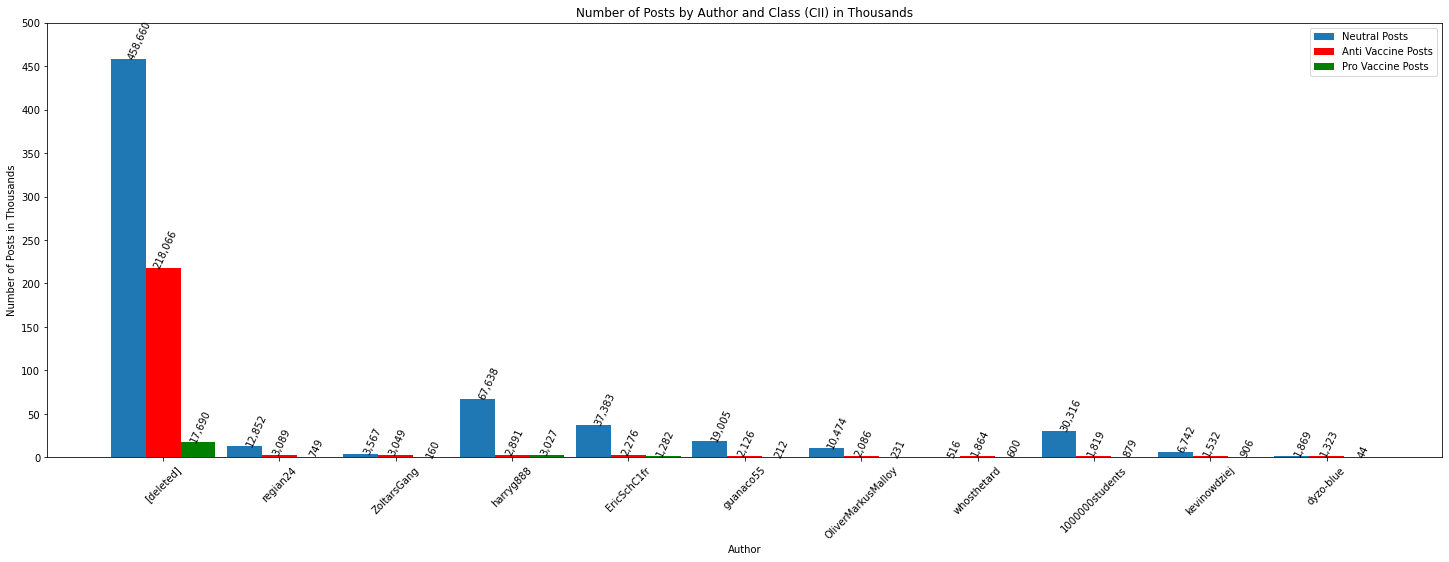

In [21]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 65)

authors = top_11['Author']
y = top_11['Neutral Posts']
y1 = top_11['Anti-Vaccine Posts']
y2 = top_11['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 8))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.2)
addlabels(x, y1, 0.02)
addlabels(x, y2, 0.32)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
plt.yticks(ticks=[0,50000, 100000, 150000, 200000,250000, 300000, 350000, 400000, 450000, 500000], labels=[0, 50,100,150,200,250,300, 350, 400, 450, 500])
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=45)
plt.legend()
plt.savefig("../../Visualizations/RQ1/C2_top_11.pdf")

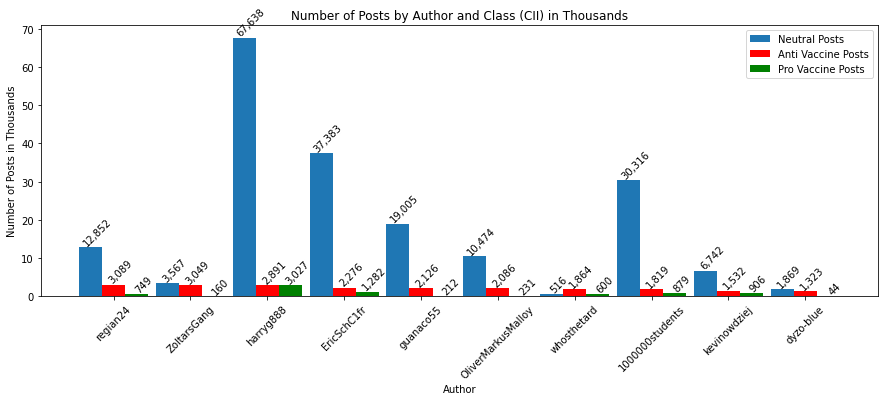

In [80]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset +0.09), (y[i] + 400), "{:,}".format(int(y[i])), ha = 'center', rotation = 45)

authors = top_10['Author']
y = top_10['Neutral Posts']
y1 = top_10['Anti-Vaccine Posts']
y2 = top_10['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 5))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.3)
addlabels(x, y1, 0.0)
addlabels(x, y2, 0.3)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
plt.yticks(ticks=[0,10000, 20000, 30000,40000, 50000, 60000, 70000], labels=[0, 10,20,30,40,50, 60, 70])
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=45)
plt.legend()
plt.savefig("../../Visualizations/RQ1/C2_top_10.pdf", bbox_inches='tight')


In [82]:
top_10p = df[df['total'] > 300].sort_values(by='p_an', ascending=False)[0:10].reset_index(drop=True)

In [87]:
print(authors)

0        LordRaghuvnsi
1       SickestBiscuit
2    smallie-cheese-69
3      jessicarae28382
4              mdtau11
5        -GreggRulzOk-
6           yasshost77
7            Bowser914
8          whosthetard
9       hanglestrangle
Name: Author, dtype: object


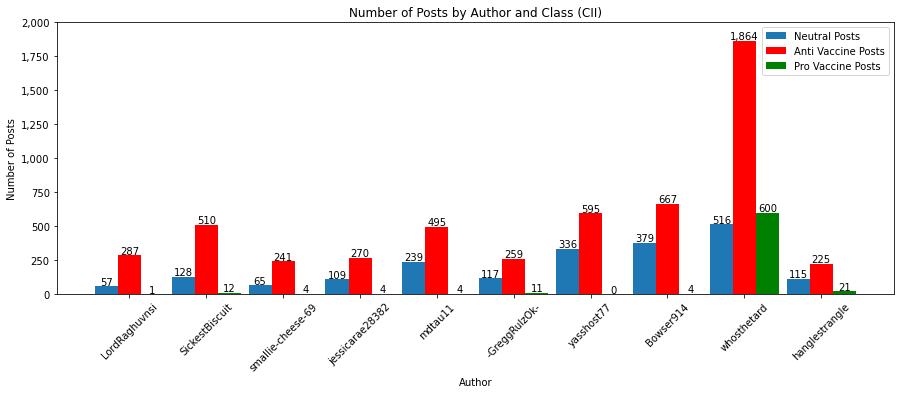

In [85]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 10), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

authors = top_10p['Author']
y = top_10p['Neutral Posts']
y1 = top_10p['Anti-Vaccine Posts']
y2 = top_10p['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (15, 5))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.3)
addlabels(x, y1, 0.0)
addlabels(x, y2, 0.3)
plt.title("Number of Posts by Author and Class (CII)")
plt.yticks(ticks=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000], labels=[0 ,250,500, 750, '1,000' ,'1,250', '1,500', '1,750', '2,000'])
plt.ylabel("Number of Posts")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=45)
plt.legend()

plt.savefig("../../Visualizations/RQ1/C2_top_10_anp.pdf", bbox_inches='tight')


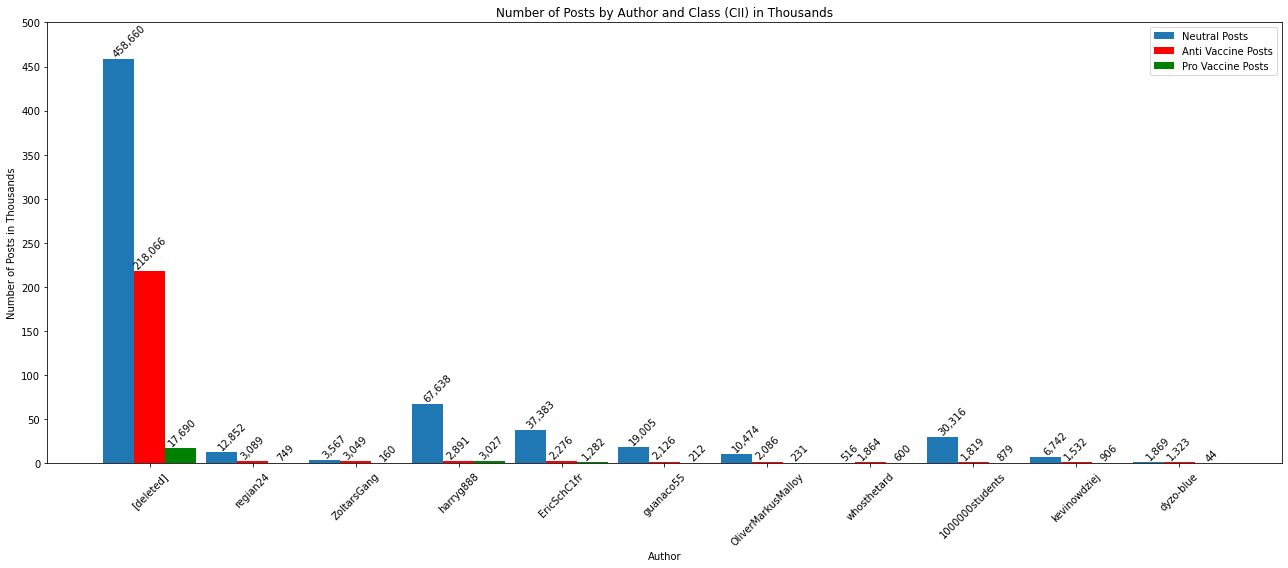

In [24]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 2500), "{:,}".format(int(y[i])), ha = 'center', rotation = 45)

authors = top_11['Author']
y = top_11['Neutral Posts']
y1 = top_11['Anti-Vaccine Posts']
y2 = top_11['Pro-Vaccine Posts']
x = np.arange(len(authors))
width = 0.3

fig, ax = plt.subplots(figsize = (18, 8))
rects1 = ax.bar(x - width, y, width, label='Neutral Posts')
rects2 = ax.bar(x , y1, width, label='Anti Vaccine Posts', color='red')
rects3 = ax.bar(x + width, y2, width, label='Pro Vaccine Posts', color='green')
addlabels(x, y, -0.2)
addlabels(x, y1, 0.0)
addlabels(x, y2, 0.32)
plt.title("Number of Posts by Author and Class (CII) in Thousands")
plt.yticks(ticks=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000], labels=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.ylabel("Number of Posts in Thousands")

plt.xlabel("Author")
plt.xticks(x, authors, rotation=45)
plt.tight_layout()
plt.legend()


In [12]:
df2 = pd.read_csv('../../Files/Submissions/author_db.csv')

In [45]:
df2 = df2.drop([0,1], axis=0)
df2.rename({'Unnamed: 0': 'Date', 
    'score' : 'Anti-Vaccine Posts', 
    'score.1': 'Neutral Posts', 
    'score.2': 'Pro-Vaccine Posts'}, axis=1, inplace=True)
df2.reset_index(drop=True, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])